In [236]:
import gymnasium as gym
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from stable_baselines3 import DQN
from stable_baselines3.common.env_checker import check_env
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.results_plotter import load_results, ts2xy, plot_results

In [237]:
def plot_learning_results(log_folders, labels, title='Learning Curve', xlabel='Timesteps', ylabel='Rewards'):
    plt.figure(figsize=(12, 8))

    for log_folder, label in zip(log_folders, labels):
        x, y = ts2xy(load_results(log_folder), 'timesteps')
        y = np.convolve(y, np.ones(50)/50, mode='valid')  # Moving average
        x = x[len(x) - len(y):]  # Trim x to match y length after convolution
        plt.plot(x, y, label=label, linewidth=2.5)

    # Title and labels
    plt.title(title, fontsize=18, fontweight='bold', pad=20)
    plt.xlabel(xlabel, fontsize=14, labelpad=10)
    plt.ylabel(ylabel, fontsize=14, labelpad=10)

    # Customize ticks
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    # Add grid
    plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)

    # Add legend
    plt.legend(fontsize=12, loc='best')

    # Show plot
    plt.show()

In [238]:
def plot_violin(log_folders, labels, title='Violin Plot of Rewards', xlabel='Configuration', ylabel='Rewards'):
    data = []
    for log_folder, label in zip(log_folders, labels):
        x, y = ts2xy(load_results(log_folder), 'timesteps')
        y = np.convolve(y, np.ones(50)/50, mode='valid')  # Moving average
        x = x[len(x) - len(y):]  # Trim x to match y length after convolution
        data.append(y)

    # Create a DataFrame to facilitate plotting
    df = pd.DataFrame(data).T
    df.columns = labels

    plt.figure(figsize=(12, 8))

    # Create the violin plot
    parts = plt.violinplot(df, showmeans=True, showmedians=True)

    # Customizing the appearance of the violin plot
    for pc in parts['bodies']:
        pc.set_facecolor('lightpink')
        pc.set_edgecolor('black')
        pc.set_alpha(0.7)

    plt.title(title, fontsize=18, fontweight='bold', pad=20)
    plt.xlabel(xlabel, fontsize=14, labelpad=10)
    plt.ylabel(ylabel, fontsize=14, labelpad=10)
    plt.xticks(range(1, len(labels) + 1), labels, fontsize=12)
    plt.yticks(fontsize=12)

    plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)

    # Show plot
    plt.show()

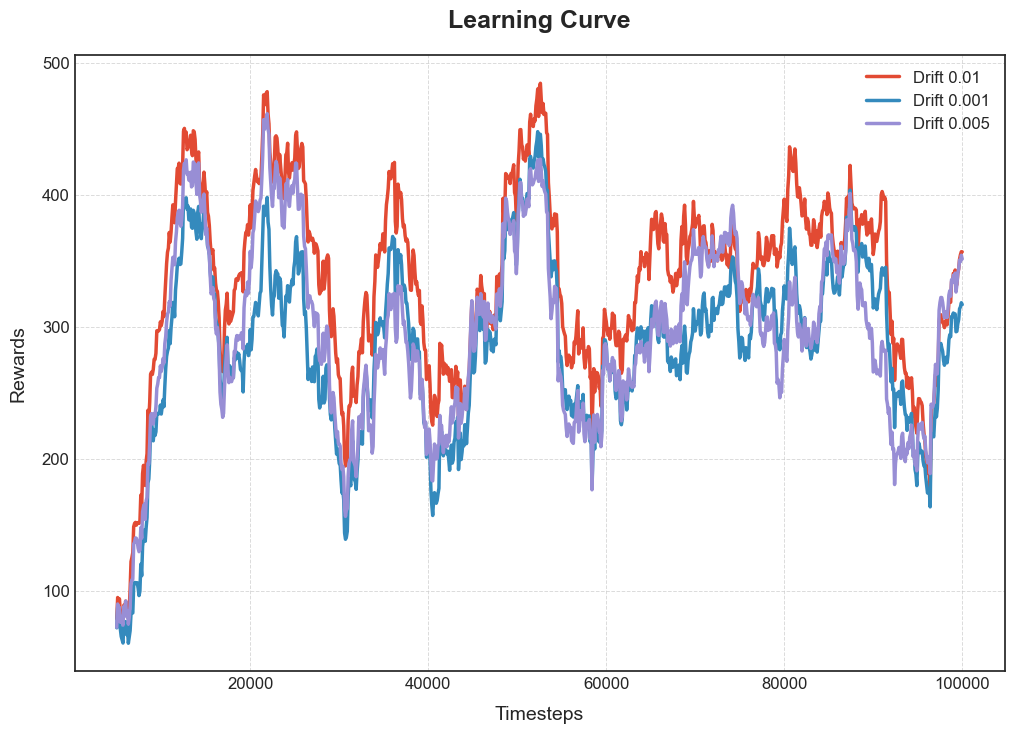

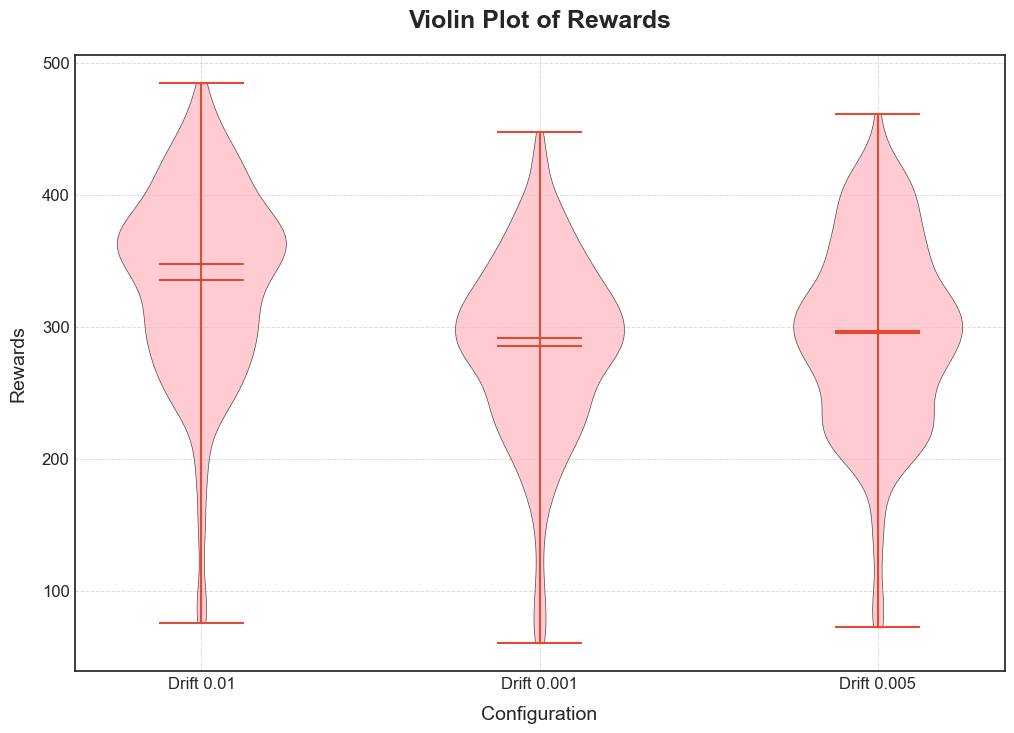

In [239]:
dir = '../models/trained_models/DQN/'

labels = ['Drift 0.01', 'Drift 0.001', 'Drift 0.005']
plot_learning_results([dir+'drift/0.01', dir+'drift/0.001', dir+'drift/0.005'], labels)
plot_violin([dir+'drift/0.01', dir+'drift/0.001', dir+'drift/0.005'], labels)

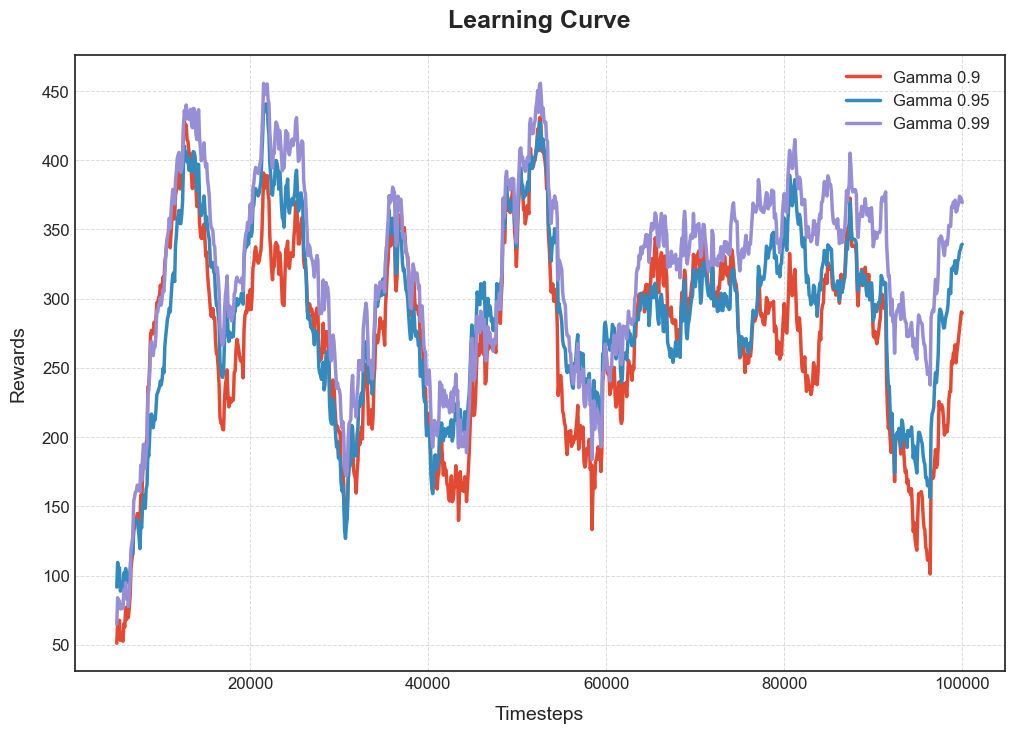

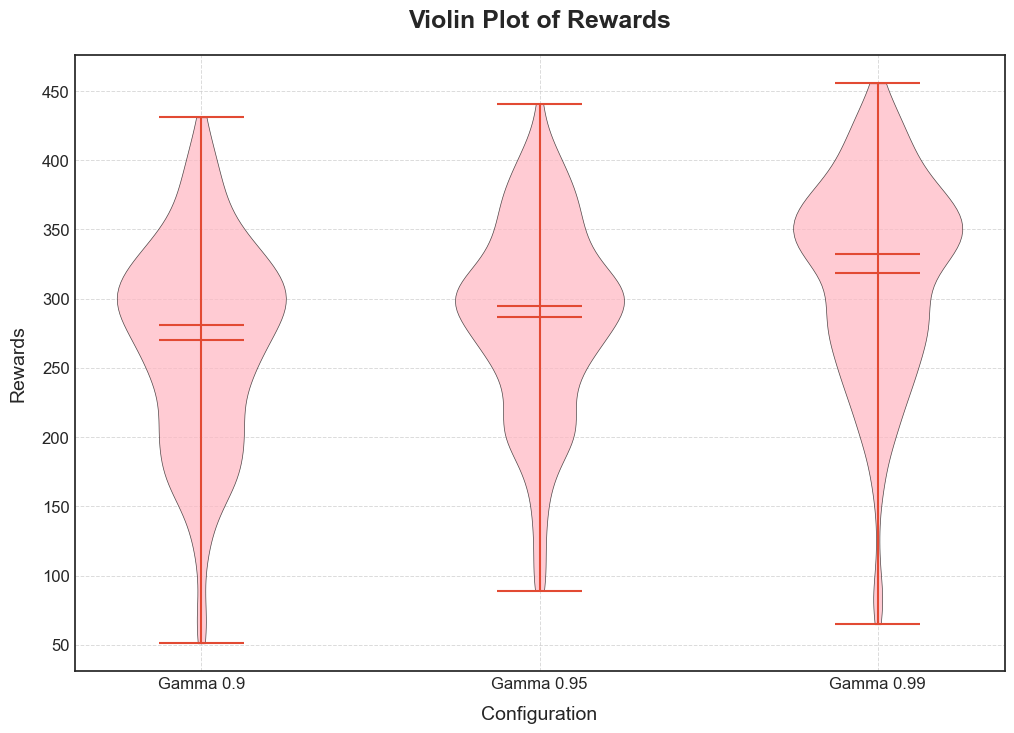

In [240]:
dir = '../models/trained_models/DQN/'

labels = ['Gamma 0.9', 'Gamma 0.95', 'Gamma 0.99']
plot_learning_results([dir+'gamma/0.9', dir+'gamma/0.95', dir+'gamma/0.99'], labels)
plot_violin([dir+'gamma/0.9', dir+'gamma/0.95', dir+'gamma/0.99'], labels)

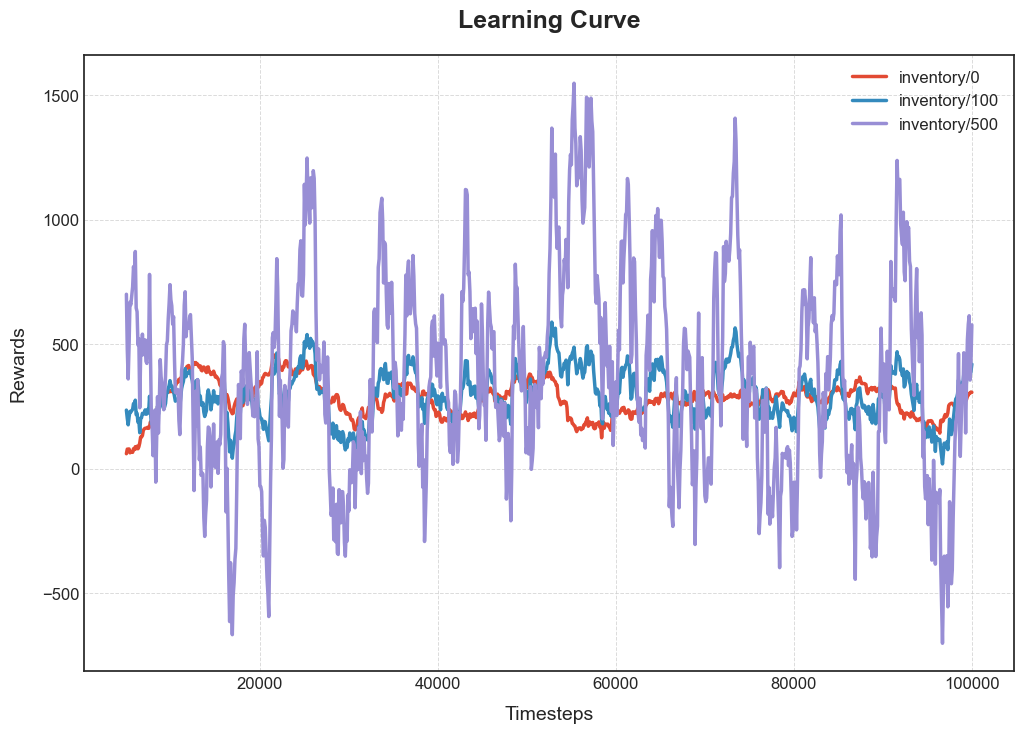

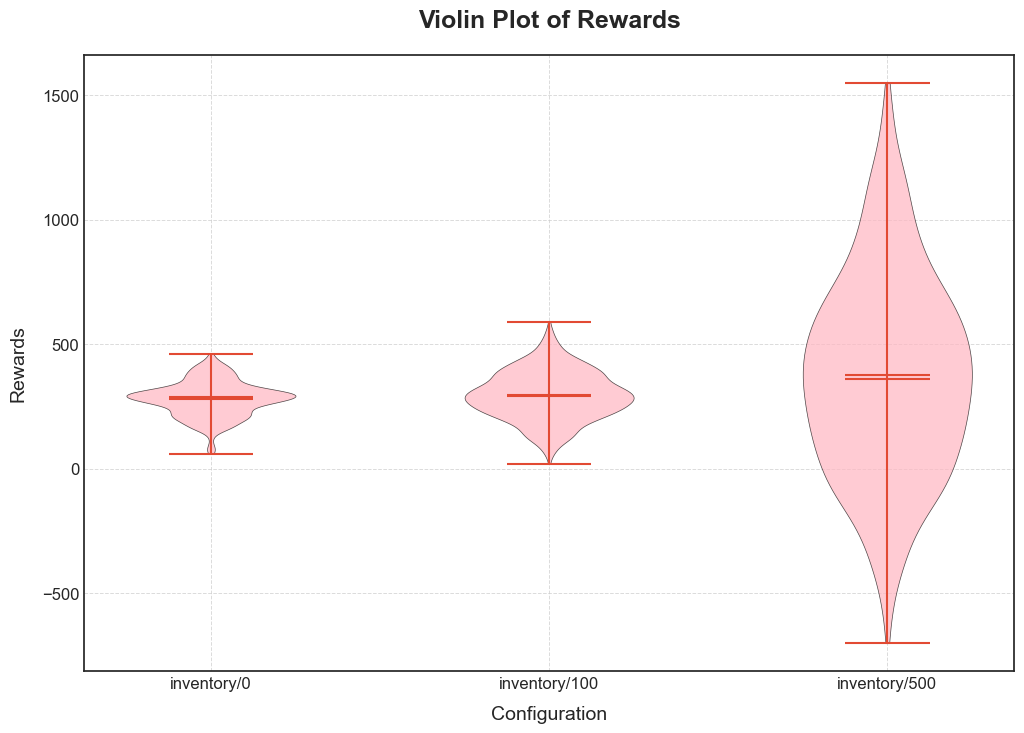

In [241]:
dir = '../models/trained_models/DQN/'

labels = ['inventory/0', 'inventory/100', 'inventory/500']
plot_learning_results([dir+labels[0], dir+labels[1], dir+labels[2]], labels)
plot_violin([dir+labels[0], dir+labels[1], dir+labels[2]], labels)

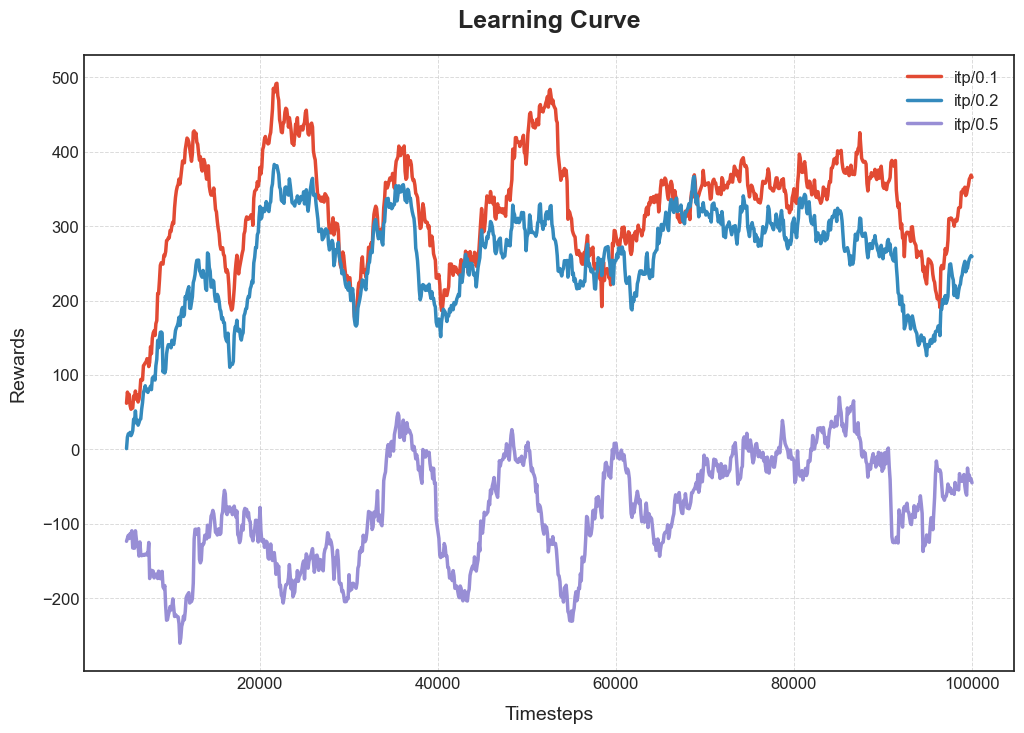

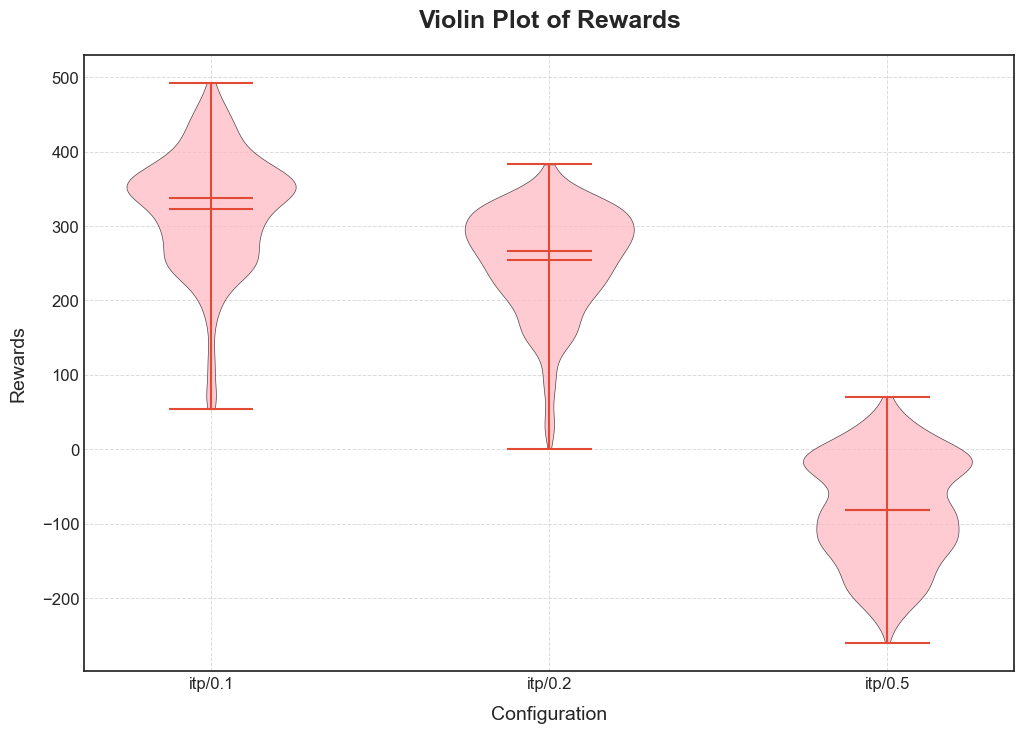

In [242]:
dir = '../models/trained_models/DQN/'

labels = ['itp/0.1', 'itp/0.2', 'itp/0.5']
plot_learning_results([dir+labels[0], dir+labels[1], dir+labels[2]], labels)
plot_violin([dir+labels[0], dir+labels[1], dir+labels[2]], labels)

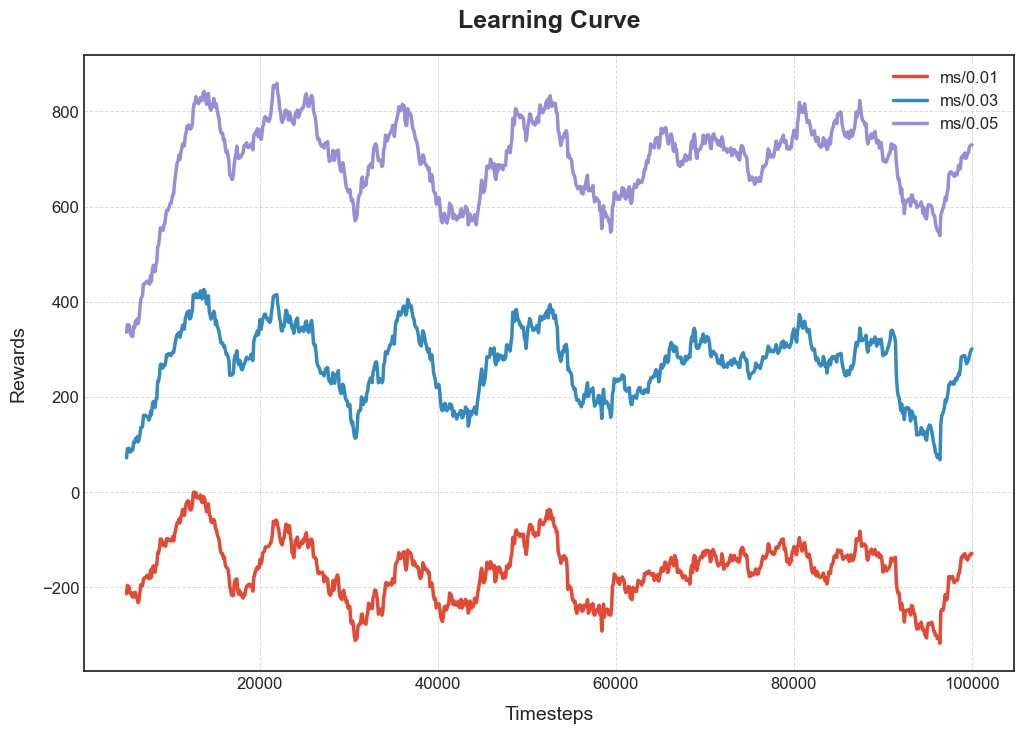

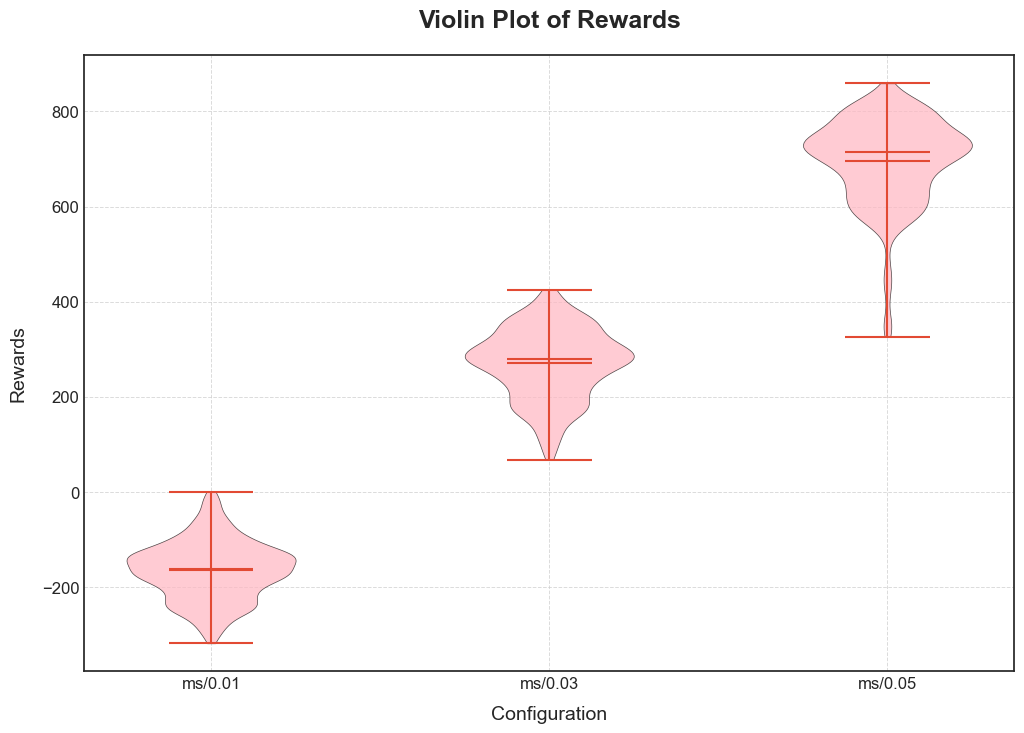

In [243]:
dir = '../models/trained_models/DQN/'

labels = ['ms/0.01', 'ms/0.03', 'ms/0.05']
plot_learning_results([dir+labels[0], dir+labels[1], dir+labels[2]], labels)
plot_violin([dir+labels[0], dir+labels[1], dir+labels[2]], labels)

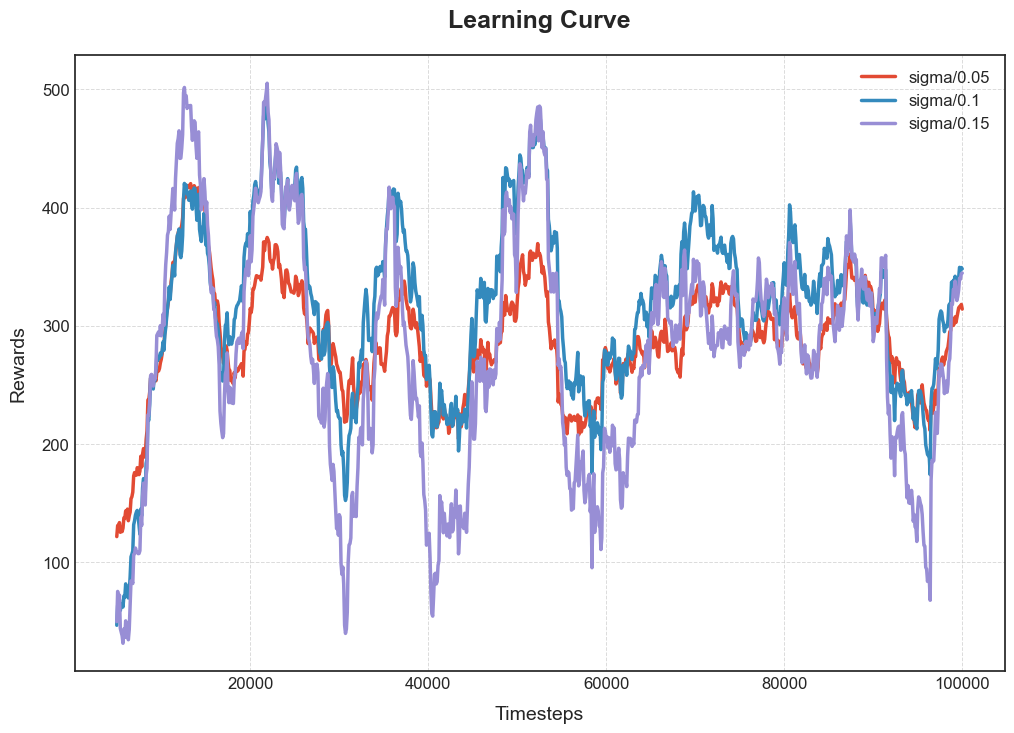

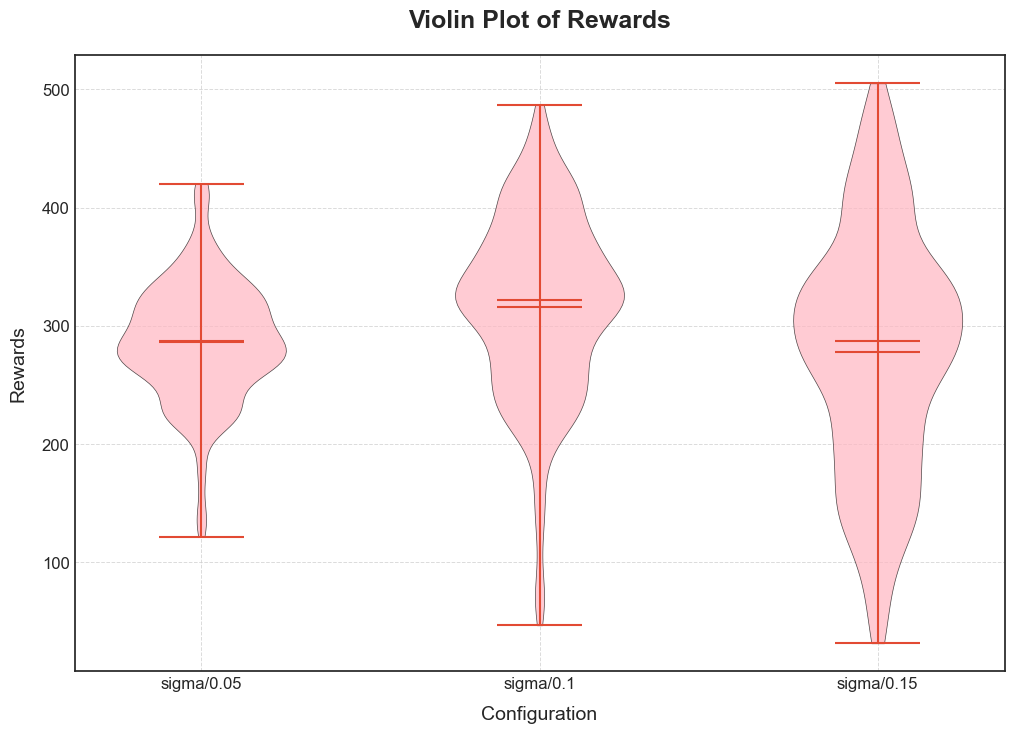

In [244]:
dir = '../models/trained_models/DQN/'

labels = ['sigma/0.05', 'sigma/0.1', 'sigma/0.15']
plot_learning_results([dir+labels[0], dir+labels[1], dir+labels[2]], labels)
plot_violin([dir+labels[0], dir+labels[1], dir+labels[2]], labels)

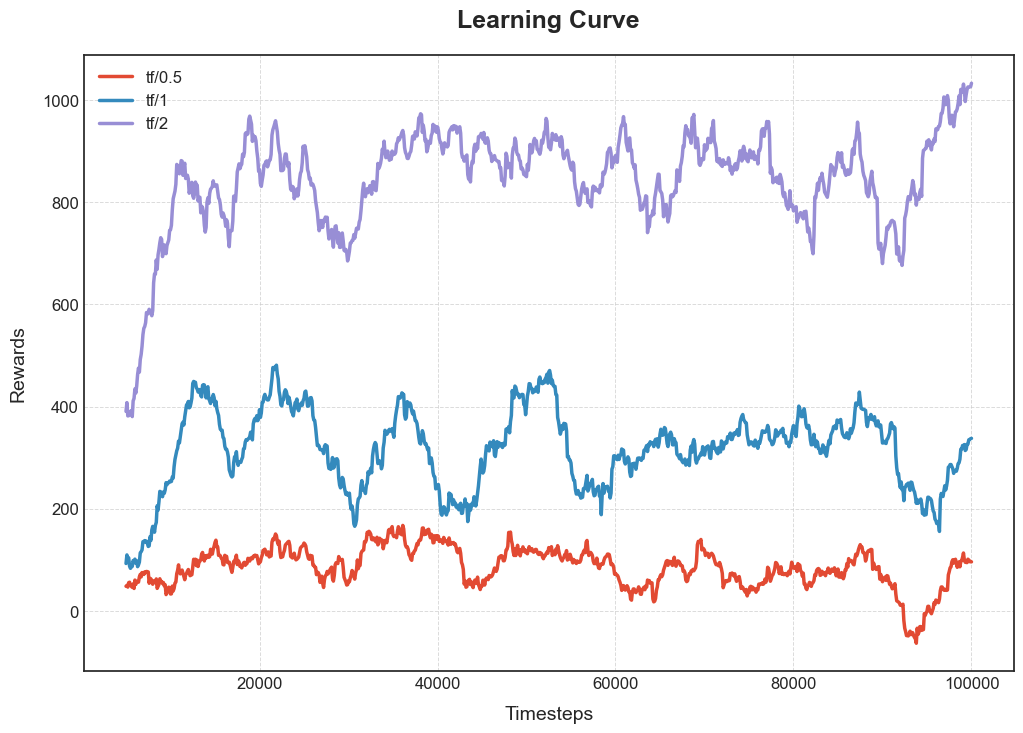

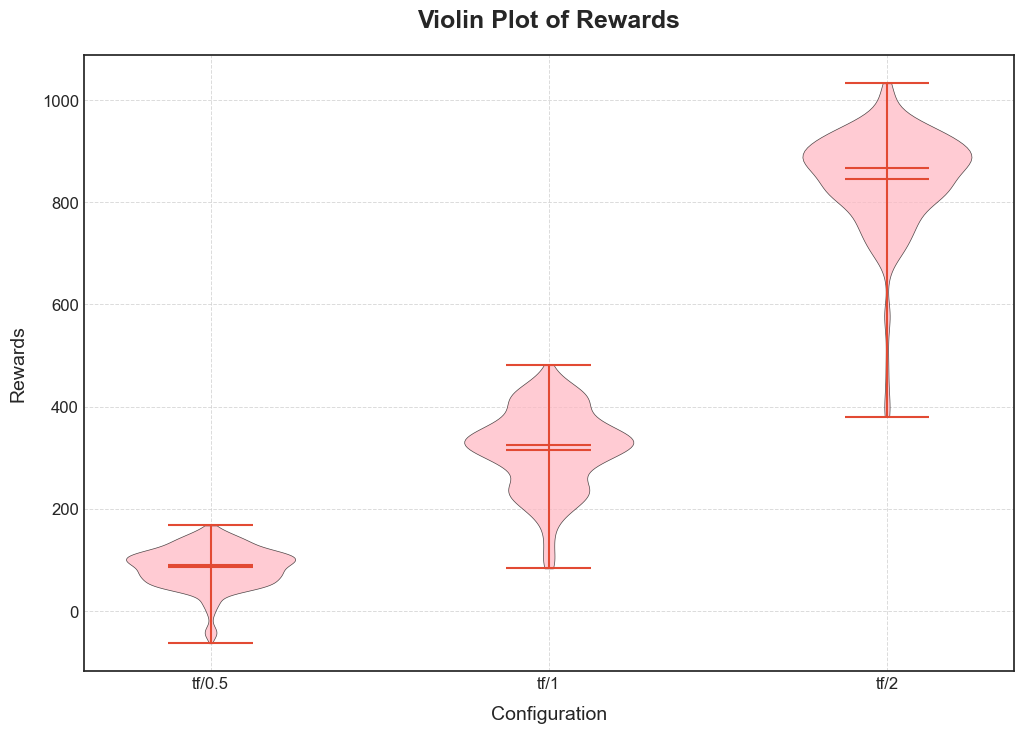

In [245]:
dir = '../models/trained_models/DQN/'

labels = ['tf/0.5', 'tf/1', 'tf/2']
plot_learning_results([dir+labels[0], dir+labels[1], dir+labels[2]], labels)
plot_violin([dir+labels[0], dir+labels[1], dir+labels[2]], labels)

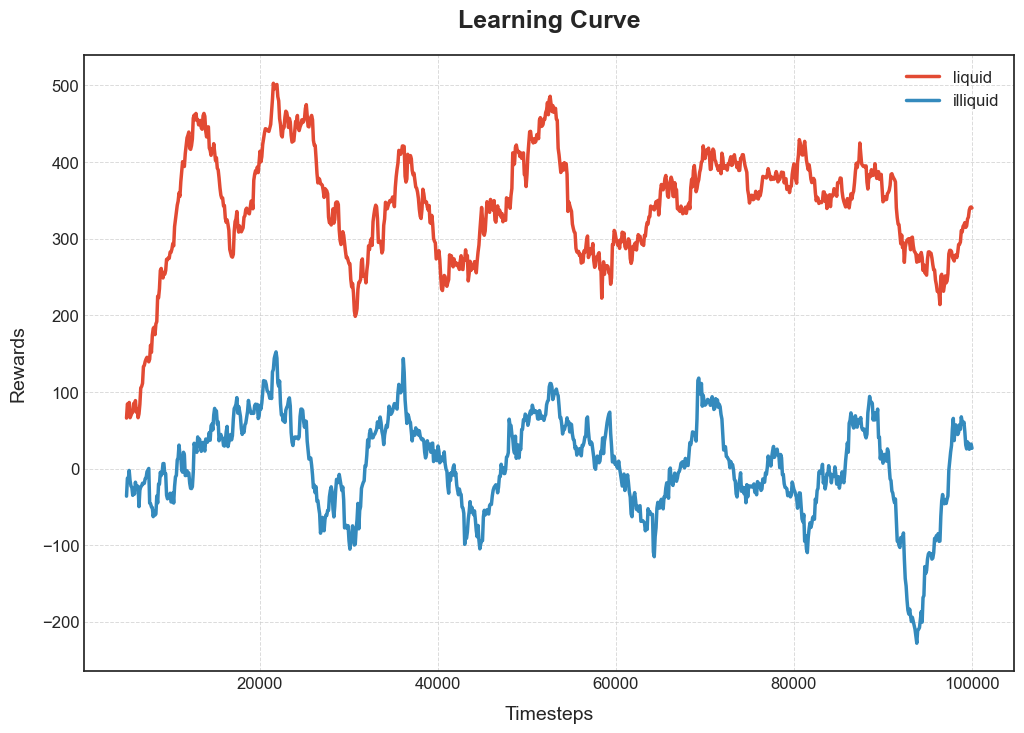

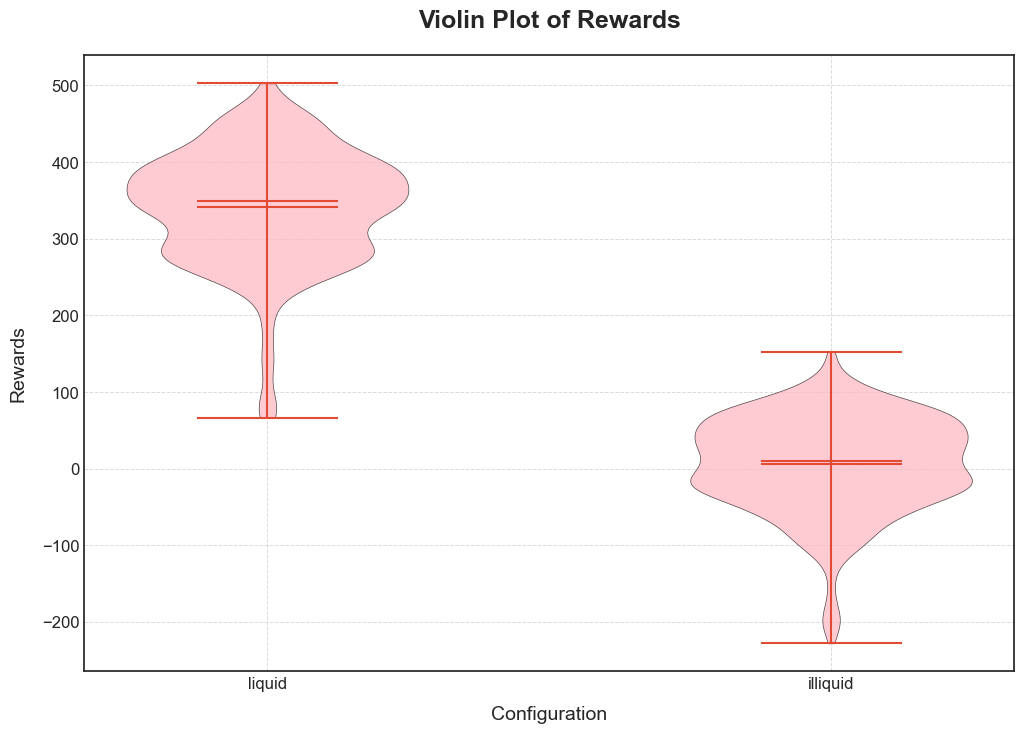

In [246]:
dir = '../models/trained_models/DQN/'

labels = ['liquid', 'illiquid']
plot_learning_results([dir+labels[0], dir+labels[1]], labels)
plot_violin([dir+labels[0], dir+labels[1]], labels)

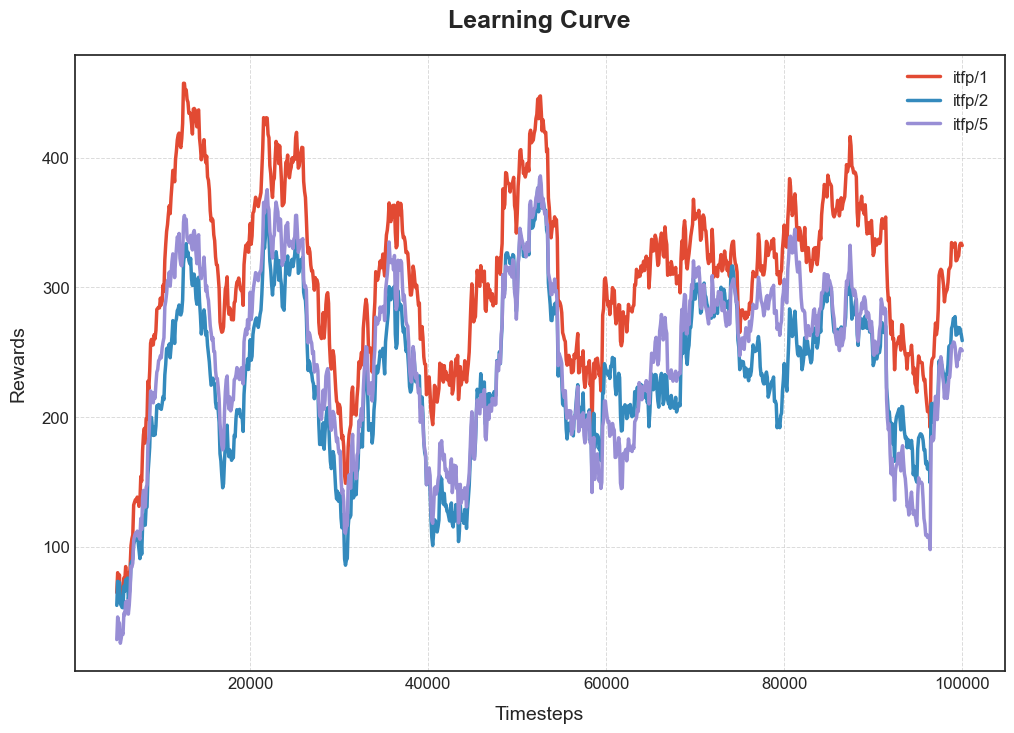

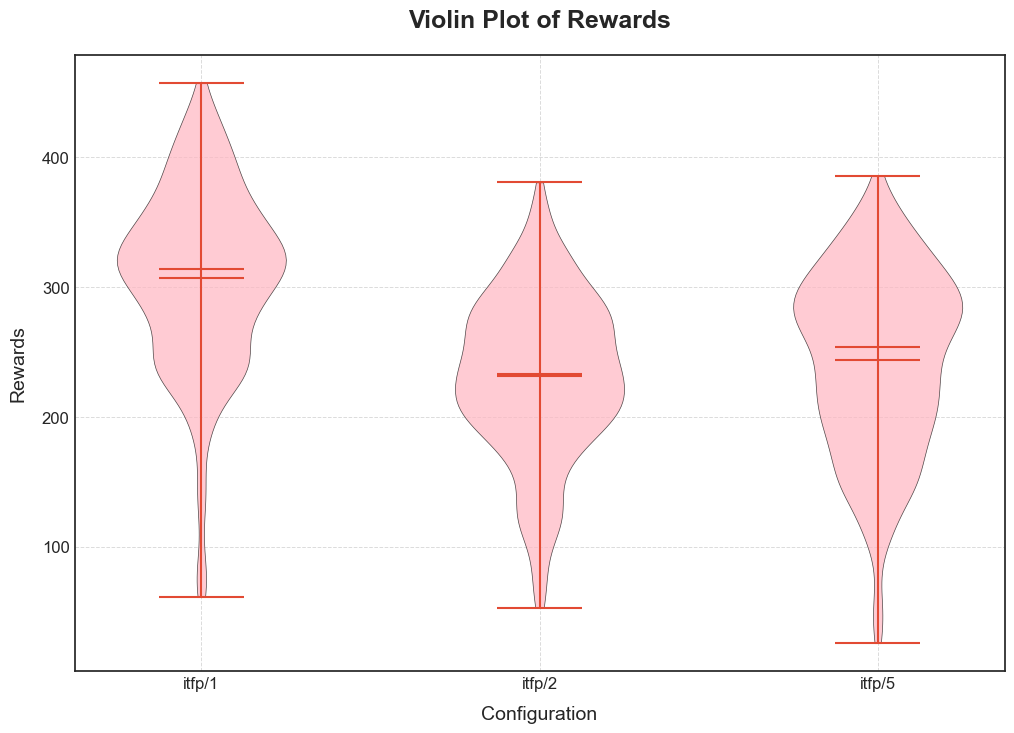

In [248]:
dir = '../models/trained_models/DQN/'

labels = ['itfp/1', 'itfp/2', 'itfp/5']
plot_learning_results([dir+labels[0], dir+labels[1], dir+labels[2]], labels)
plot_violin([dir+labels[0], dir+labels[1], dir+labels[2]], labels)

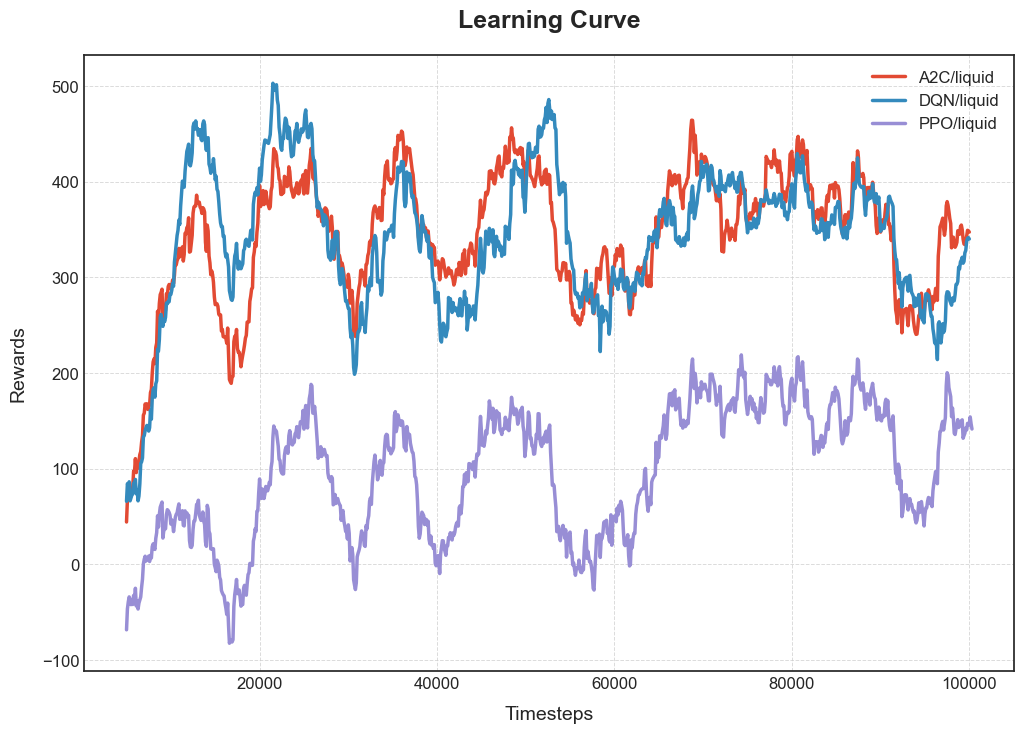

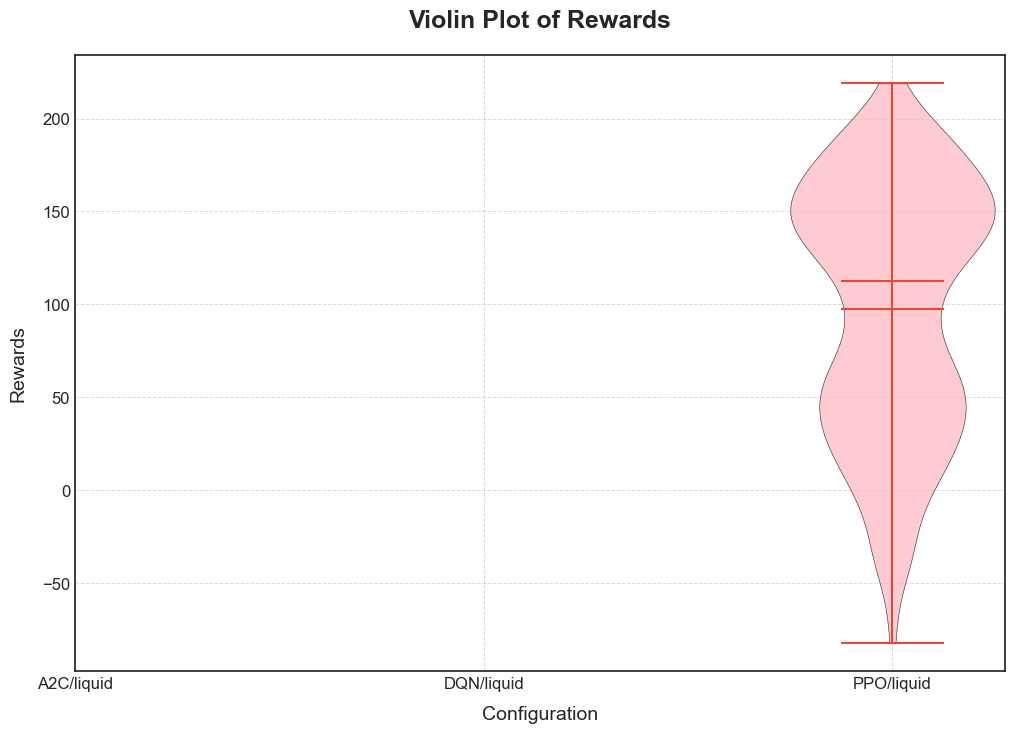

In [263]:
dir = '../models/trained_models/'

labels = ['A2C/liquid', 'DQN/liquid', 'PPO/liquid']
plot_learning_results([dir+labels[0], dir+labels[1], dir+labels[2]], labels)
plot_violin([dir+labels[0], dir+labels[1], dir+labels[2]], labels)